In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Understanding Preparation and EDA

### Data Understanding

In [3]:
house_data.shape

(1460, 81)

In [4]:
#get description of data
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#checking data for null values
house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Data Cleaning and Manipulation

In [6]:
#dropping columns where null values > 80
null_percentage=house_data.isnull().sum()/house_data.shape[0]
columns=null_percentage[null_percentage>0.80].keys()
house_data=house_data.drop(columns,axis=1)
house_data.shape

(1460, 77)

In [7]:
#Dropping irrelevant columns
house_data.drop(['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition','BsmtExposure','GarageYrBlt','MasVnrArea'],axis=1,inplace = True)

In [8]:
#checking remaining data for null values
house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()

LotFrontage     259
MasVnrType        8
BsmtQual         37
BsmtFinType1     37
FireplaceQu     690
GarageType       81
GarageFinish     81
dtype: int64

In [9]:
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,9,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,6,...,366,0,112,0,0,0,0,4,2010,142125


In [10]:
#Checking FireplaceQu is null only in case where Fireplaces are zero
house_data[house_data["FireplaceQu"].isnull()]["Fireplaces"].unique()

array([0], dtype=int64)

In [11]:
#Filling fireplaceQu with NA
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [12]:
#checking remaining data for null values
house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()

LotFrontage     259
MasVnrType        8
BsmtQual         37
BsmtFinType1     37
GarageType       81
GarageFinish     81
dtype: int64

In [13]:
#Treating Value Lot Frontage, substuting null values with median
LotFrontage_median = house_data.LotFrontage.median()
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [14]:
#checking remaining data for null values
house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtFinType1    37
GarageType      81
GarageFinish    81
dtype: int64

In [15]:
#substituting MasVnrType as None and MasVnrArea as median Value
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [16]:
#checking remaining data for null values
house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()

BsmtQual        37
BsmtFinType1    37
GarageType      81
GarageFinish    81
dtype: int64

###### checking relation between basement field null values

In [17]:
house_data[house_data["BsmtQual"].isnull()]["BsmtFinType1"].unique()

array([nan], dtype=object)

In [18]:
#Replacing null values with Described NA or No values
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [19]:
#checking remaining data for null values
house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()

GarageType      81
GarageFinish    81
dtype: int64

###### checking relation between Garage field null values

In [20]:
#Replacing null values with Described NA values
house_data.GarageType = house_data.GarageType.fillna('NA')
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [21]:
#checking remaining data for null values
house_data[house_data.columns[house_data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [22]:
#Converting year sold and year build to house age variable
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [23]:
# checking number of unique values for each column
house_data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
LotShape            4
LotConfig           5
Neighborhood       25
HouseStyle          8
OverallQual        10
OverallCond         9
YearRemodAdd       61
RoofStyle           6
Exterior1st        15
Exterior2nd        16
MasVnrType          4
ExterQual           4
Foundation          6
BsmtQual            5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
HeatingQC           5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Fireplaces          4
FireplaceQu         6
GarageType          7
GarageFinish        4
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch 

In [24]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1460 non-null   object 
 18  BsmtFinT

In [25]:
# Changing MSSubClass type to object as it is a categorical variable
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [26]:
# Converting categorical variables
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

<AxesSubplot:>

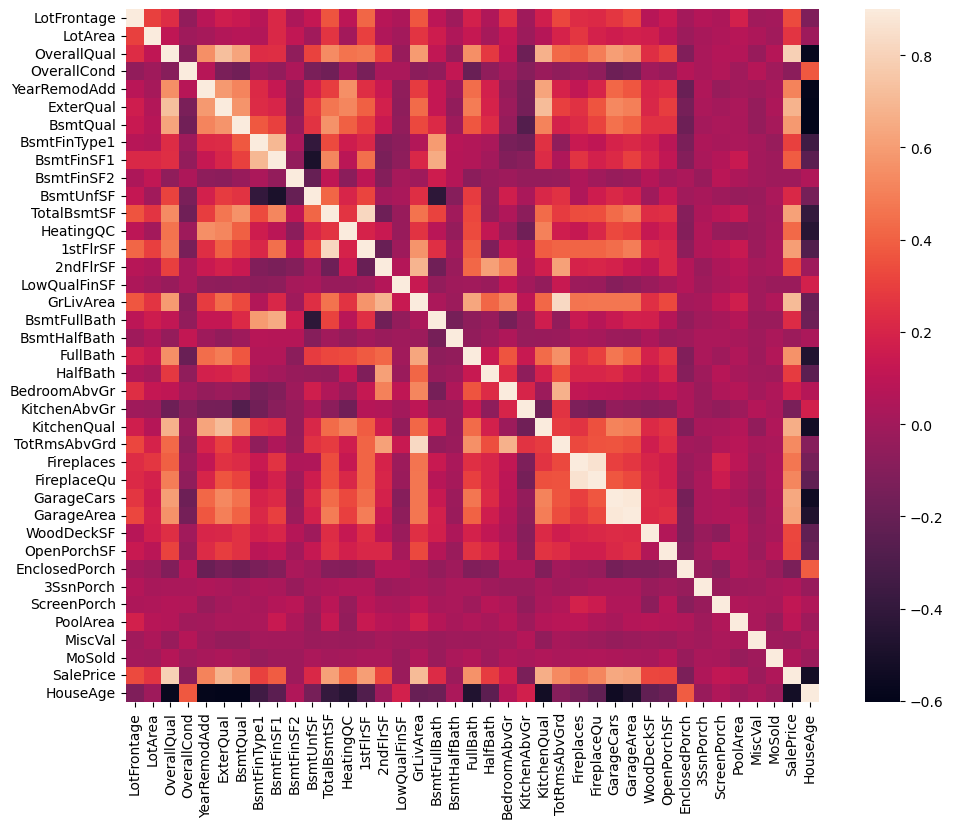

In [27]:
#Correlation map to see how features are correlated with SalePrice
corrmat = house_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

From the pairplot given above we can see that some of the numerical colums are highly related with the sales price
- Overall Quality
- Year removeadd
- External quality
- Basement quality
- TotalBsmn SF
- 1st Foor SF
- Gr Living Area
- Fullbath
- Kitchen quality
- Total Rms Abv Grd
- Fireplaces
- fireplace quality
- Garage Cars
- Garage Area

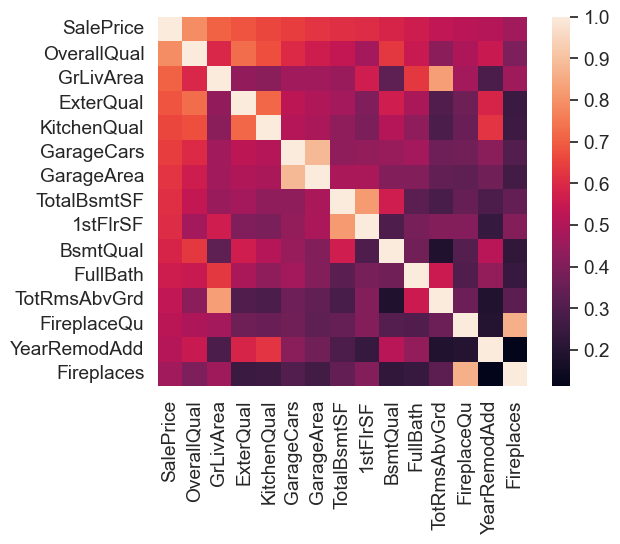

In [28]:
# Getting most correlated variables
k = 15
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see from the above chart that the top 15 variables are similar to what we had initially observed

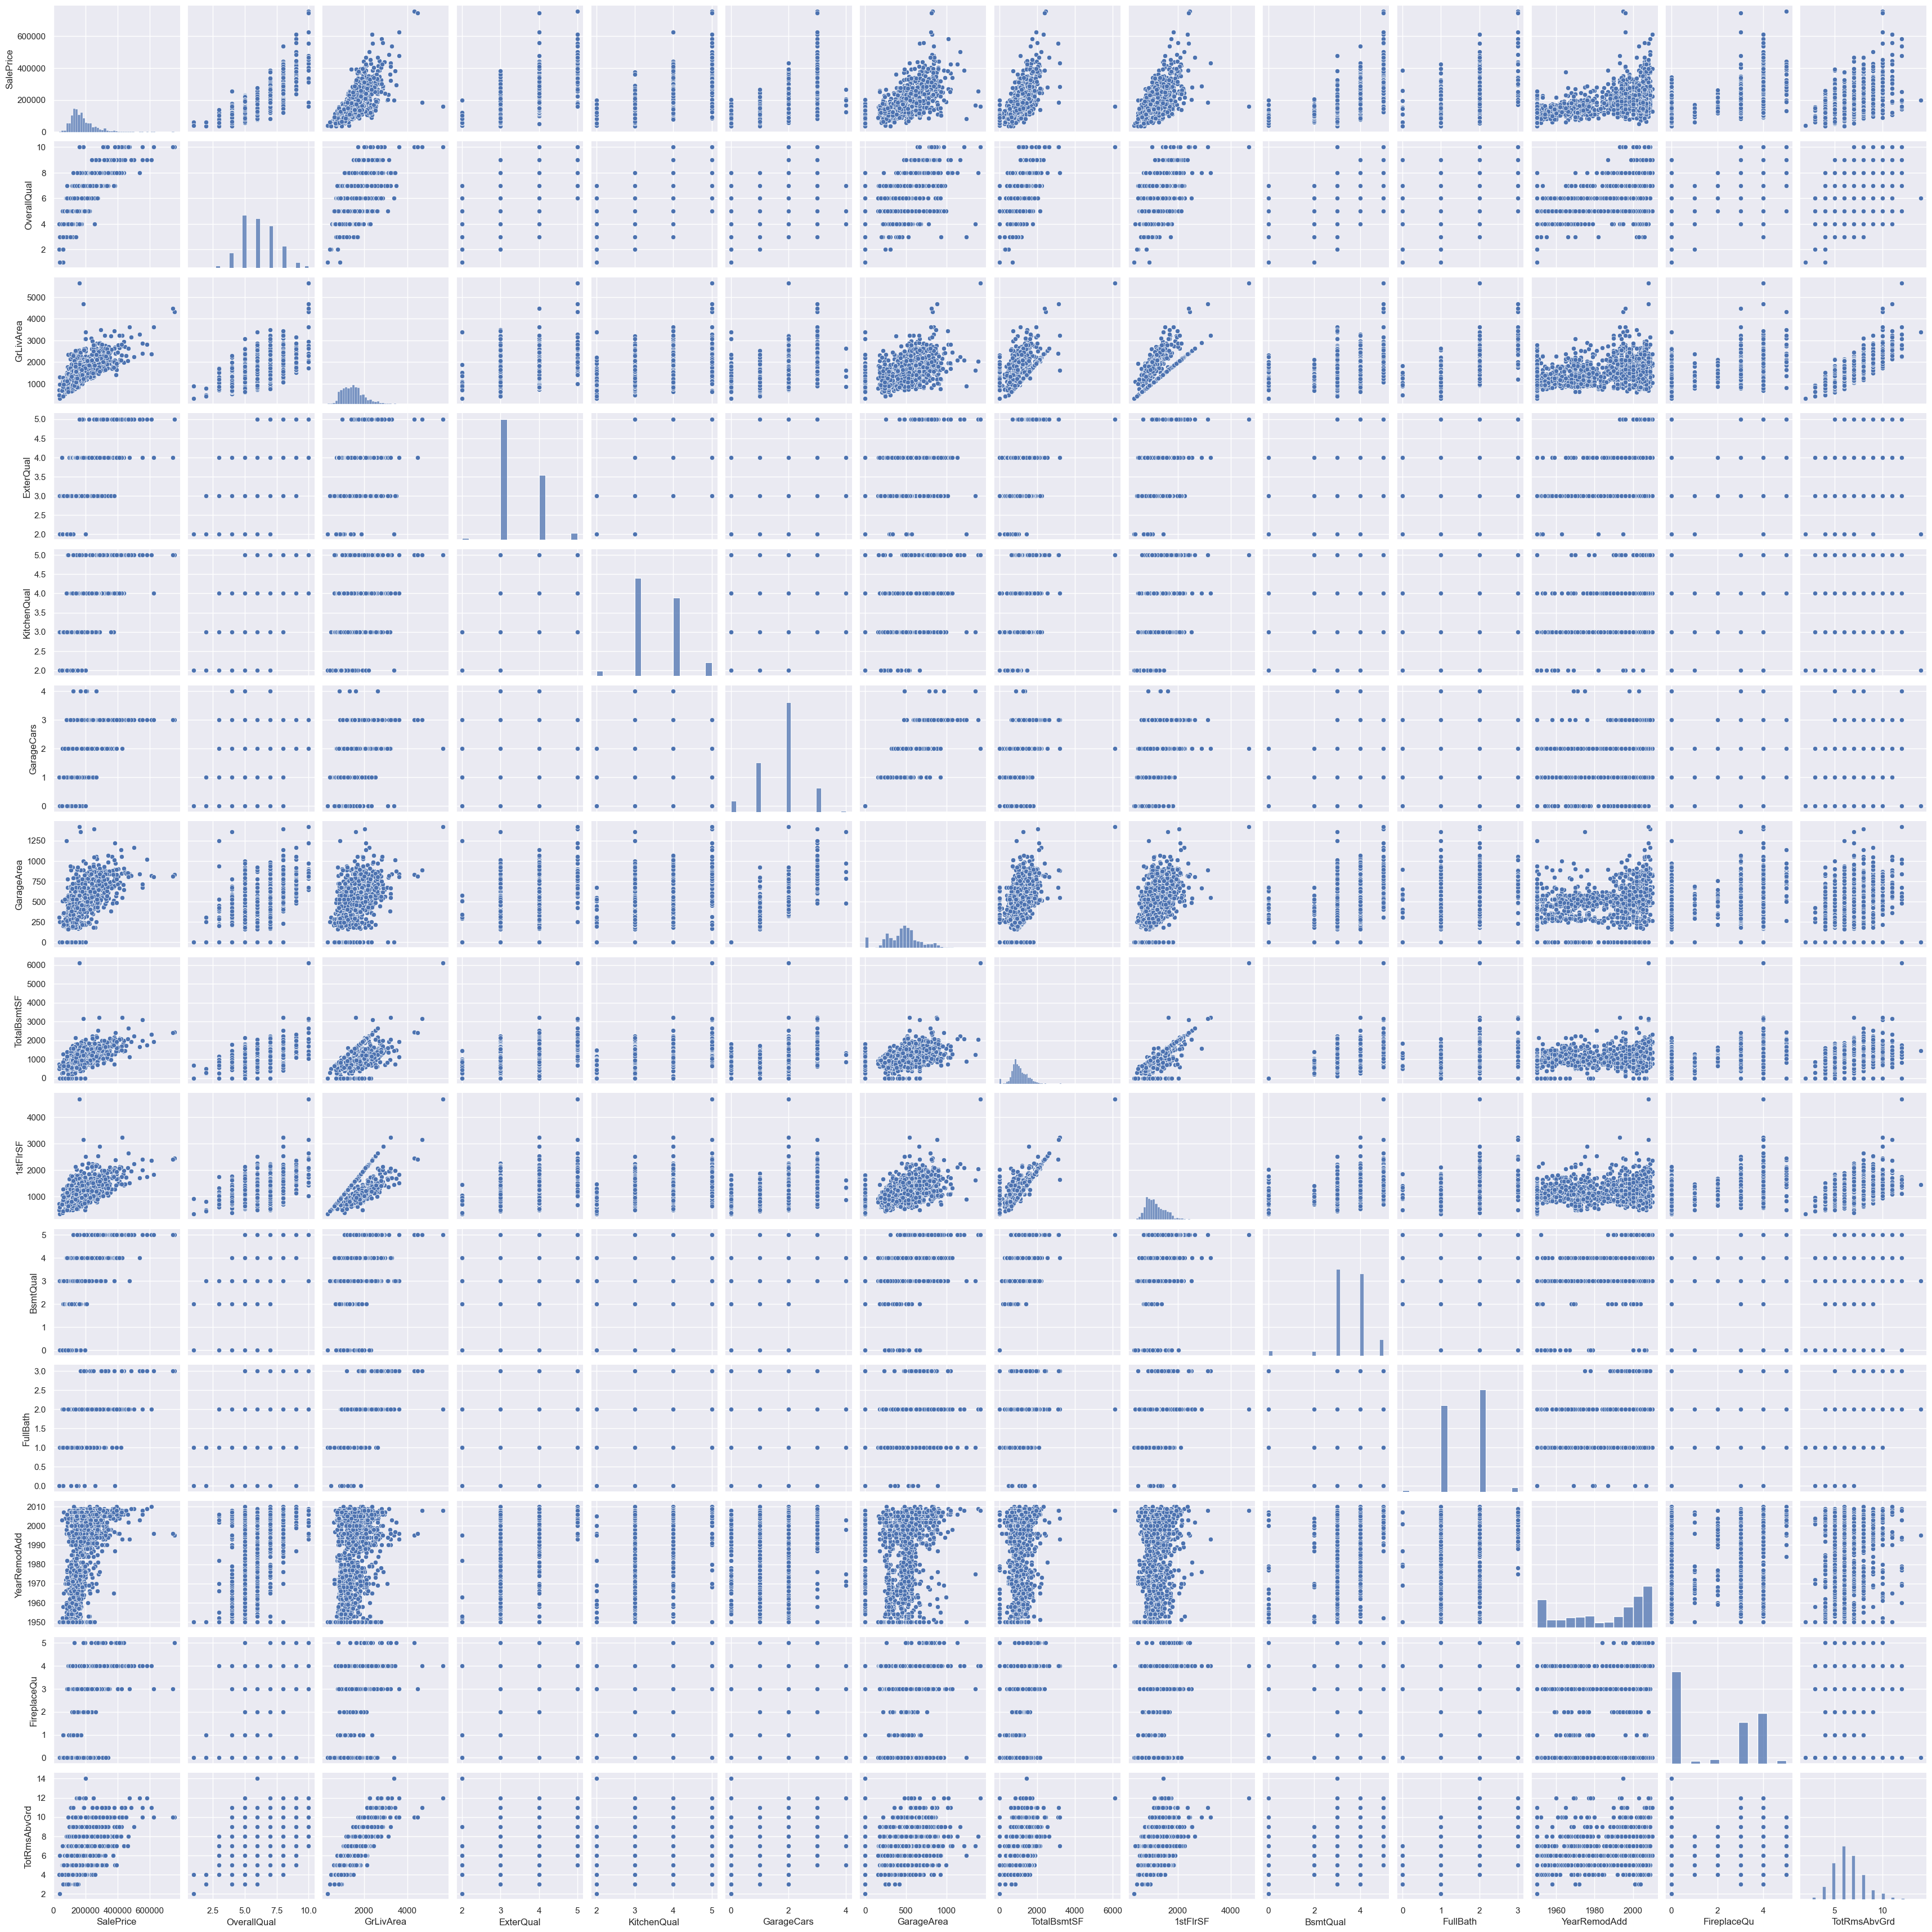

In [29]:
#Checking Pair plot for top variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','ExterQual','KitchenQual', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','BsmtQual', 'FullBath', 'YearRemodAdd','FireplaceQu','TotRmsAbvGrd']
sns.pairplot(data=house_data,vars=cols)
plt.show()

###### Creating Dummy Variables

In [30]:
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


In [31]:
house_data_MSSubClass=pd.get_dummies(house_data.MSSubClass,drop_first=True,prefix='MSSubClass' )
house_data_MSZoning=pd.get_dummies(house_data.MSZoning,drop_first=True,prefix='MSZoning' )
house_data_LotShape=pd.get_dummies(house_data.LotShape,drop_first=True,prefix='LotShape' )
house_data_LotConfig=pd.get_dummies(house_data.LotConfig,drop_first=True,prefix='LotConfig' )
house_data_Neighborhood=pd.get_dummies(house_data.Neighborhood,drop_first=True,prefix='Neighborhood' )
house_data_HouseStyle=pd.get_dummies(house_data.HouseStyle,drop_first=True,prefix='HouseStyle' )
house_data_RoofStyle=pd.get_dummies(house_data.RoofStyle,drop_first=True,prefix='RoofStyle' )
house_data_Exterior1st=pd.get_dummies(house_data.Exterior1st,drop_first=True,prefix='Exterior1st' )
house_data_Exterior2nd=pd.get_dummies(house_data.Exterior2nd,drop_first=True,prefix='Exterior2nd' )
house_data_MasVnrType=pd.get_dummies(house_data.MasVnrType,drop_first=True,prefix='MasVnrType' )
house_data_Foundation=pd.get_dummies(house_data.Foundation,drop_first=True,prefix='Foundation' )
house_data_GarageType=pd.get_dummies(house_data.GarageType,drop_first=True,prefix='GarageType' )
house_data_GarageFinish=pd.get_dummies(house_data.GarageFinish,drop_first=True,prefix='GarageFinish' )
house_data_final = pd.concat([house_data,house_data_MSSubClass,house_data_MSZoning,house_data_LotShape,house_data_LotConfig,house_data_Neighborhood,house_data_HouseStyle,house_data_RoofStyle,house_data_Exterior1st,house_data_Exterior2nd,house_data_MasVnrType,house_data_Foundation,house_data_GarageType,house_data_GarageFinish],axis=1)
house_data_final

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,...,0,1,0,0,0,0,0,0,1,0
1456,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,...,0,1,0,0,0,0,0,0,0,1
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,9,...,0,1,0,0,0,0,0,0,1,0
1458,20,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,6,...,0,1,0,0,0,0,0,0,0,1


In [32]:
house_data_final=house_data_final.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish'])
house_data_final.head

<bound method NDFrame.head of       LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  ExterQual  \
0            65.0     8450            7            5          2003          4   
1            80.0     9600            6            8          1976          3   
2            68.0    11250            7            5          2002          4   
3            60.0     9550            7            5          1970          3   
4            84.0    14260            8            5          2000          4   
...           ...      ...          ...          ...           ...        ...   
1455         62.0     7917            6            5          2000          3   
1456         85.0    13175            6            6          1988          3   
1457         66.0     9042            7            9          2006          5   
1458         68.0     9717            5            6          1996          3   
1459         75.0     9937            5            6          1965          4  

###### Preparing Data for modelling

In [33]:
house_data_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,7,5,2003,4,4,6,706,0,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,1976,3,4,5,978,0,...,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,4,4,6,486,0,...,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,1970,3,3,5,216,0,...,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,2000,4,4,6,655,0,...,0,1,0,0,0,0,0,0,1,0


###### Checking distribution of our target variable

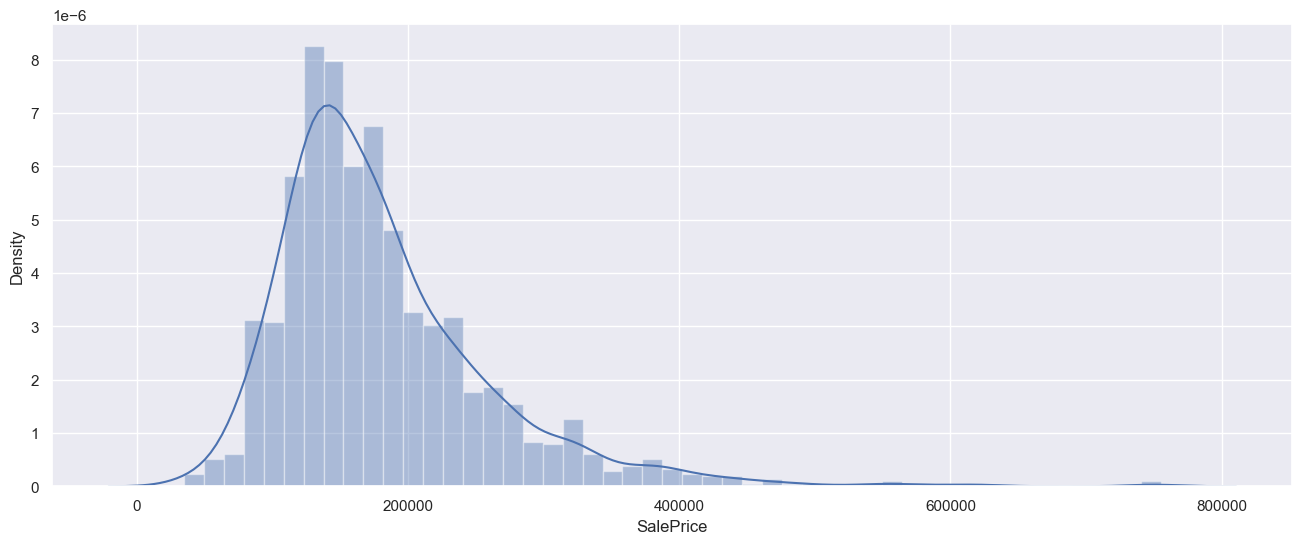

In [34]:
plt.figure(figsize=(16,6))
sns.distplot(house_data_final.SalePrice)
plt.show()

In [35]:
#df_train,df_test = train_test_split(house_data_final,train_size=0.70,random_state=100)
#Y=house_data_final.pop('SalePrice')
#X=house_data_final

In [36]:
house_data_train, house_data_test = train_test_split(house_data_final,train_size = 0.7, random_state=100)

In [37]:
num_col = ['LotArea','OverallQual','OverallCond',
           'BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
house_data_train[num_col] = scaler.fit_transform(house_data_train[num_col])
house_data_test[num_col] = scaler.transform(house_data_test[num_col])

In [38]:
Y_train = house_data_train.pop('SalePrice')
X_train = house_data_train

In [39]:
Y_test = house_data_test.pop('SalePrice')
X_test = house_data_test

In [40]:
len(X_train.columns)

145

### Model Building and Evaluation

#### Linear Regression

In [41]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, Y_train)

LinearRegression()

In [42]:
rfe = RFE(lm, n_features_to_select=70)
rfe = rfe.fit(X_train,Y_train)
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]
#lm.fit(X_train, Y_train)

In [43]:
def print_metrics(model,X_train,Y_train,X_Test,Y_Test):
    metric = []
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train_lr = r2_score(Y_train, y_pred_train)
    print("r2 train: "+str(r2_train_lr))
    metric.append(r2_train_lr)
    
    r2_test_lr = r2_score(Y_test, y_pred_test)
    print("r2 train: "+str(r2_test_lr))
    metric.append(r2_test_lr)
    
    rss1_lr = np.sum(np.square(Y_train - y_pred_train))
    print("rss train: "+str(rss1_lr))
    metric.append(rss1_lr)
    
    rss2_lr = np.sum(np.square(Y_test - y_pred_test))
    print("rss train: "+str(rss2_lr))
    metric.append(rss2_lr)
    
    mse_train_lr = mean_squared_error(Y_train, y_pred_train)
    print("mse train: "+str(mse_train_lr))
    metric.append(mse_train_lr**0.5)
    
    mse_test_lr = mean_squared_error(Y_test, y_pred_test)
    print("mse train: "+str(mse_test_lr))
    metric.append(mse_test_lr**0.5)
    
    return metric

In [44]:
#metric1=print_metrics(lm,X_train,Y_train,X_test,Y_test)

In [45]:
#rfe_scores[rfe_scores.Rank==1]

#### Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

##### Ridge Regression

In [46]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,150,200,250,300,350,400,450, 500, 1000 ]}
#params = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, Y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 150, 200, 250, 300, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

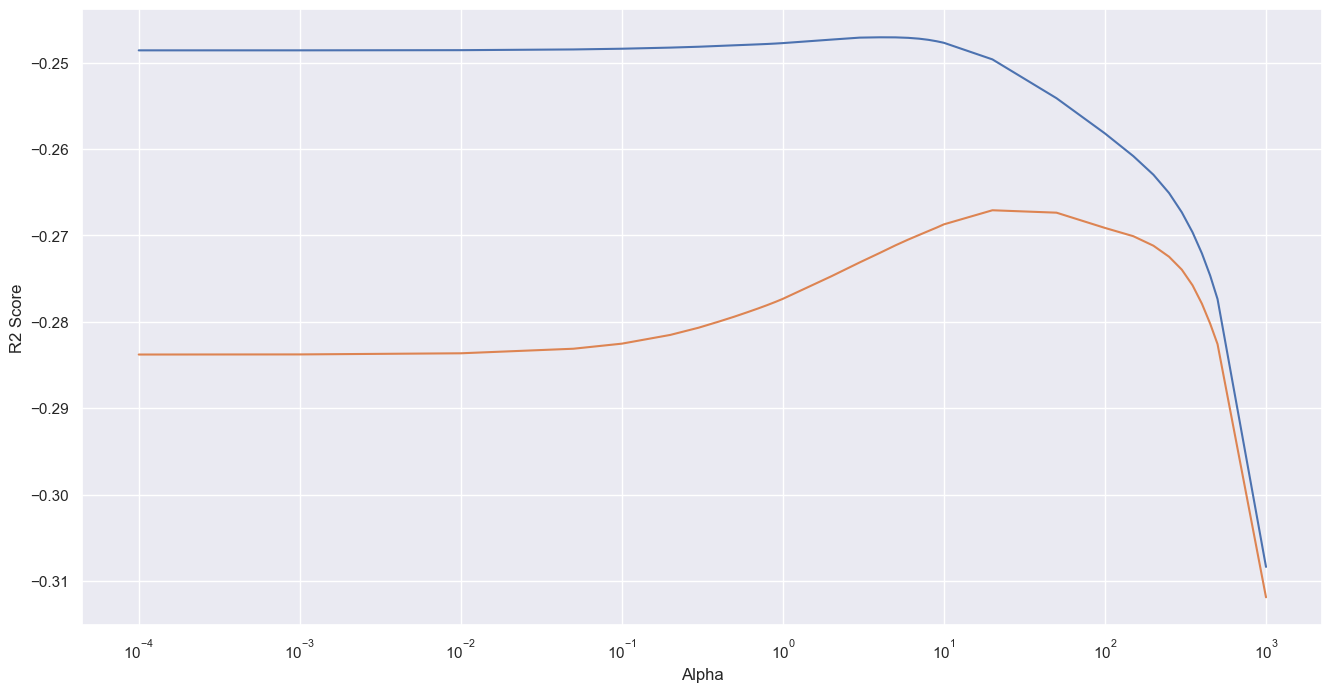

In [47]:
cv_result_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [48]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)
alpha_ridge=model_cv_ridge.best_params_.get("alpha")

{'alpha': 20}


In [49]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = alpha_ridge
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
print(ridge.coef_)

[ 0.06346832  0.31325341  0.20191147  0.07989025  0.01560945 -0.03537173
  0.05217256  0.10721845  0.11869703 -0.01969695  0.17562245  0.14546582
  0.0035077   0.02374651  0.10092999  0.08799993 -0.03153593 -0.10709763
  0.02099275  0.02906647  0.11239725 -0.06975234 -0.19284904 -0.01304396
  0.11153422  0.19493572 -0.165805    0.03305126  0.03281154 -0.08908769
 -0.06464151  0.34615965  0.30722317 -0.08842279  0.12047858  0.0947983
  0.02739462  0.19532842  0.00540609  0.09237545  0.09206526 -0.00044245
 -0.01523191 -0.02151651  0.11562253  0.04250679  0.00355255 -0.02679074
  0.01711174 -0.01537189 -0.00928567  0.02599815 -0.00696374 -0.01523191
 -0.02393405  0.04766376  0.09332387  0.02416937  0.09209659  0.0271792
  0.02052692  0.00614478 -0.16906685  0.08471531  0.02252292  0.00247549
  0.00571136 -0.07252178  0.10009709  0.10009709]


In [50]:
metric_ridge=print_metrics(ridge,X_train,Y_train,X_test,Y_test)

r2 train: 0.8250199712813879
r2 train: 0.8290043102015423
rss train: 178.65460932170294
rss train: 77.3025439366609
mse train: 0.17498002871861207
mse train: 0.17608779940013872


##### Lasso

In [51]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, Y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 150, 200, 250, 300, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

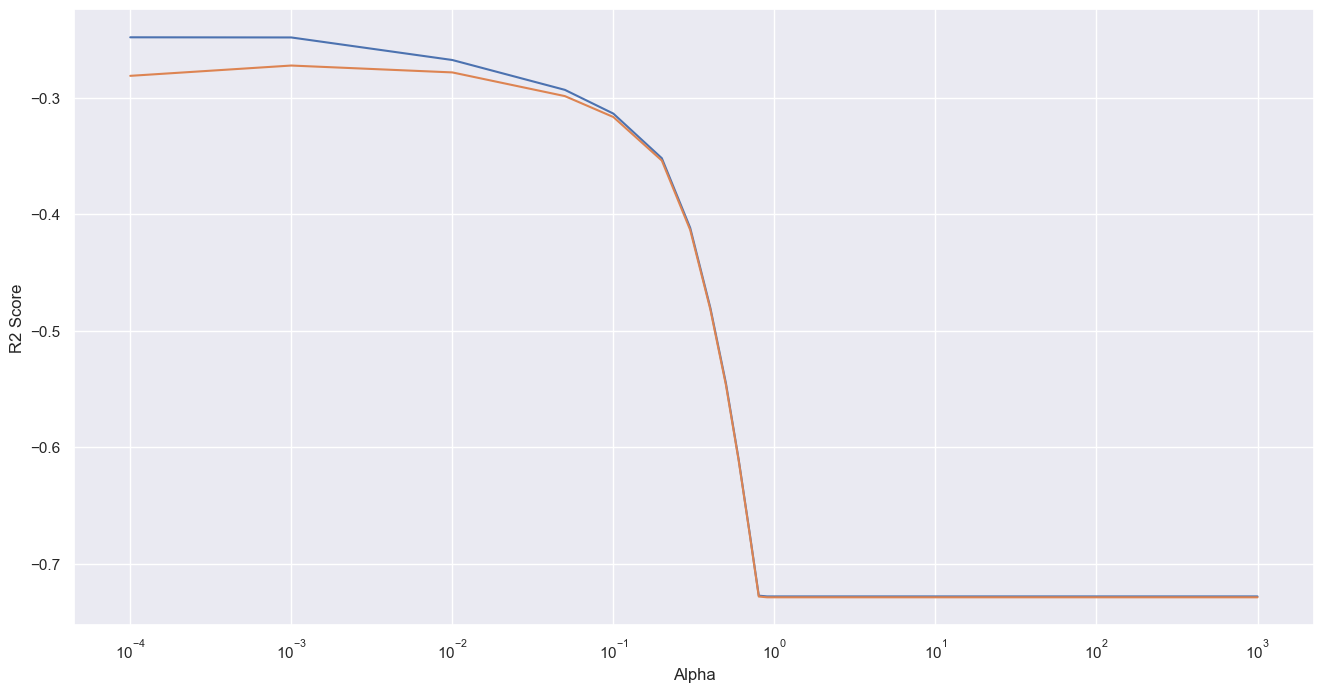

In [52]:
cv_result_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [53]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)
alpha_lasso=model_cv_lasso.best_params_.get("alpha")

{'alpha': 0.001}


In [54]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
value=model_cv_lasso.best_params_.values
alpha =alpha_lasso

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=0.001)

In [55]:
lasso.coef_

array([ 0.07414356,  0.30512103,  0.18827913,  0.11656063,  0.02811539,
       -0.        ,  0.01282939,  0.        ,  0.06955466, -0.02489047,
        0.29401147,  0.13723967, -0.        ,  0.        ,  0.20744254,
        0.14829235, -0.        , -0.16014729,  0.        ,  0.03353816,
        0.13325279, -0.        , -0.48178941, -0.        ,  0.17650078,
        0.35437096, -0.18551888,  0.00451749,  0.        , -0.08293811,
       -0.0455415 ,  0.5677112 ,  0.48795943, -0.05613366,  0.24970846,
        0.20983486,  0.15475996,  0.38302922, -0.        ,  0.29049026,
        0.27089558, -0.        , -0.        , -0.        ,  0.18369957,
        0.        ,  0.        , -0.        ,  0.01183915, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.14191244,  0.00574381,  0.13878021,  0.01612774,
        0.        , -0.        , -0.29096634,  0.10256431,  0.        ,
        0.        , -0.00295517, -0.11180359,  0.21477436,  0.  

In [56]:
metric_lasso=print_metrics(lasso,X_train,Y_train,X_test,Y_test)

r2 train: 0.8344842448206379
r2 train: 0.8266695513938465
rss train: 168.99158603812876
rss train: 78.35802548433114
mse train: 0.16551575517936215
mse train: 0.17849208538572012


In [57]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric_ridge
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.825020,0.834484
1,R2 Score (Test),0.829004,0.826670
2,RSS (Train),178.654609,168.991586
3,RSS (Test),77.302544,78.358025
4,MSE (Train),0.418306,0.406836
5,MSE (Test),0.419628,0.422483


### Lets observe the changes in the coefficients after regularization

#### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elimination i am goint to consider that as my final model.

In [58]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotArea,0.063468,0.074144
OverallQual,0.313253,0.305121
ExterQual,0.201911,0.188279
BsmtFinSF1,0.079890,0.116561
BsmtFinSF2,0.015609,0.028115
BsmtUnfSF,-0.035372,-0.000000
TotalBsmtSF,0.052173,0.012829
1stFlrSF,0.107218,0.000000
2ndFlrSF,0.118697,0.069555
LowQualFinSF,-0.019697,-0.024890


In [59]:
betas[betas['Lasso']>0].sort_values(['Lasso'], ascending=[False])['Lasso']

Neighborhood_NoRidge    0.567711
Neighborhood_NridgHt    0.487959
HouseStyle_1Story       0.383029
Neighborhood_Crawfor    0.354371
OverallQual             0.305121
GrLivArea               0.294011
HouseStyle_SFoyer       0.290490
HouseStyle_SLvl         0.270896
Neighborhood_Somerst    0.249708
GarageType_NA           0.214774
Neighborhood_Veenker    0.209835
MSSubClass_50           0.207443
ExterQual               0.188279
Exterior1st_BrkFace     0.183700
Neighborhood_ClearCr    0.176501
HouseStyle_1.5Unf       0.154760
MSSubClass_60           0.148292
Exterior2nd_CmentBd     0.141912
Exterior2nd_ImStucc     0.138780
GarageCars              0.137240
MSZoning_RL             0.133253
BsmtFinSF1              0.116561
Exterior2nd_VinylSd     0.102564
LotArea                 0.074144
2ndFlrSF                0.069555
MSZoning_RH             0.033538
BsmtFinSF2              0.028115
Exterior2nd_MetalSd     0.016128
TotalBsmtSF             0.012829
Exterior1st_MetalSd     0.011839
Exterior2n

### Above extracted parameters positively influence the sale price
